In [ ]:

import pandas as pd
import datetime as dt
import time
import datetime
from matplotlib import pyplot as plt
import string
%matplotlib inline
from nltk import word_tokenize, sent_tokenize, pos_tag
import nltk
nltk.download()

In [ ]:
a_submission_data = pd.read_csv('a_submissions_clean.csv', sep="|", dtype={"author": str, "created_utc": int, "full_link": str, "id": str, 
                                                            "link_flair_text":str, "num_comments":int, "score":int, 
                                                            "seltext":str,"title":str, "timestamp":str, "wordlen": float,"body": str }, parse_dates=["timestamp"])
d_submission_data = pd.read_csv('d_submissions_clean.csv',sep="|", dtype={"author": str, "created_utc": int, "full_link": str, "id": str, 
                                                            "link_flair_text":str, "num_comments":int, "score":int, 
                                                            "seltext":str,"title":str, "timestamp":str, "wordlen": float,"body": str, }, parse_dates=["timestamp"])
a_comment_data = pd.read_csv('a_comments_clean.csv',sep="|", dtype={"author": str, "body": str, "created_utc": int, "id": str, 
                                                            "link_id":str, "parent_id":str, "permalink":str, 
                                                            "score":int,"timestamp":str, "wordlen": float}, parse_dates=["timestamp"])
d_comment_data = pd.read_csv('d_comments_clean.csv',sep="|", dtype={"author": str, "body": str, "created_utc": int, "id": str, 
                                                            "link_id":str, "parent_id":str, "permalink":str, 
                                                           "score":int,"timestamp":str, "wordlen": float}, parse_dates=["timestamp"])


In [ ]:
print("Forum")
print("Total Posts", len(a_submission_data.id))
print("Shortest post", a_submission_data.wordlen.min())
print("Longest post",a_submission_data.wordlen.max())
print("Mean length post",a_submission_data.wordlen.mean())
print("Median length post",a_submission_data.wordlen.median())
print("Mode length post",a_submission_data[a_submission_data.wordlen>1].wordlen.mode())

print("Total Comments", len(a_comment_data.id))
print("Shortest comment", a_comment_data.wordlen.min())
print("Longest comment",a_comment_data.wordlen.max())
print("Mean length comment",a_comment_data.wordlen.mean())
print("Median length comment",a_comment_data.wordlen.median())
print("Mode length comment",a_comment_data[a_comment_data.wordlen>1].wordlen.mode())


In [51]:
merge_df = a_submission_data[['id','wordlen','body']]

In [52]:
merge_df = pd.concat([merge_df, d_submission_data[['id','wordlen','body']]], ignore_index=True)

In [53]:
merge_df['parent_id'] = merge_df['id']

In [54]:
merge_df['link_id'] = merge_df['id']

In [55]:
merge_df = pd.concat([merge_df, a_comment_data[['id','wordlen','body','parent_id','link_id']]], ignore_index=True)

In [56]:
merge_df = pd.concat([merge_df, d_comment_data[['id','wordlen','body','parent_id','link_id']]], ignore_index=True)

In [57]:
merge_df['parent_id'] = merge_df['parent_id'].str.replace('t1_','')

In [58]:
merge_df['parent_id'] = merge_df['parent_id'].str.replace('t3_','')

In [59]:
merge_df['link_id'] = merge_df['link_id'].str.replace('t1_','')
merge_df['link_id'] = merge_df['link_id'].str.replace('t3_','')

In [ ]:
merge_df

In [7]:
merge_df.to_csv("merge_posts1.csv", index=False, sep="|", encoding="utf-8")

In [4]:
#merge_df_ = pd.read_csv('merge_posts.csv',sep="|",encoding = "ISO-8859-1")
merge_df = pd.read_csv('merge_posts1.csv',sep="|",encoding = "utf-8")

In [5]:
t_df = pd.read_csv('twitter_merge.csv',sep="|",encoding = "utf-8", error_bad_lines=False, warn_bad_lines =False)
d_df = pd.read_csv('scrape.csv',sep="|",encoding = "utf-8", error_bad_lines=False, warn_bad_lines =False)

In [6]:
def ret_len(mystr):
    try:
        return len(word_tokenize(mystr))
    except:
        return 0

t_df["wordlen"] = t_df.body.apply(ret_len)
d_df["wordlen"] = d_df.body.apply(ret_len)

In [ ]:
drugs=[]
with open("drug_selection.txt") as instream:
    for line in instream:
        drugs.append(line.replace('Â\xa0\n','').replace('Â\xa0',''))

In [ ]:
merge_df

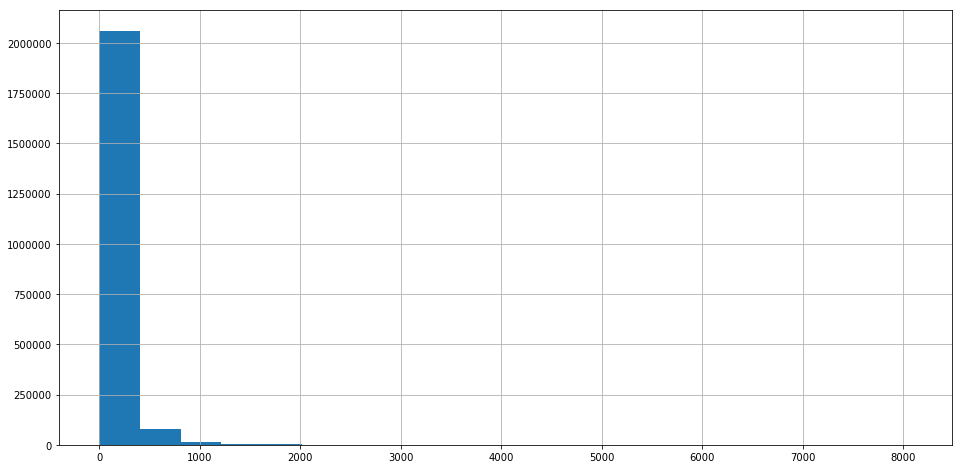

In [14]:
_=merge_df.wordlen.hist(bins=20, figsize=(16,8))

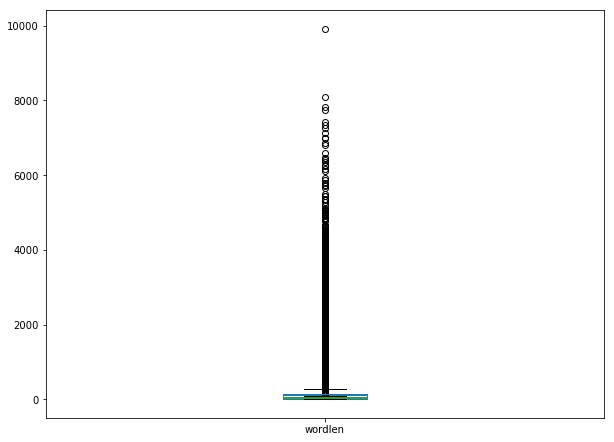

In [33]:
_=merge_df.wordlen.plot.box(figsize=(10,7.5))
_=t_df.wordlen.plot.box(figsize=(10,7.5))
_=d_df.wordlen.plot.box(figsize=(10,7.5))

In [ ]:
import numpy as np

lens = [[0 if np.isnan(x) else x for x in list(merge_df.wordlen)],
list(t_df.wordlen),
list(d_df.wordlen)]

In [ ]:
for i in lens:
    print(len(i))

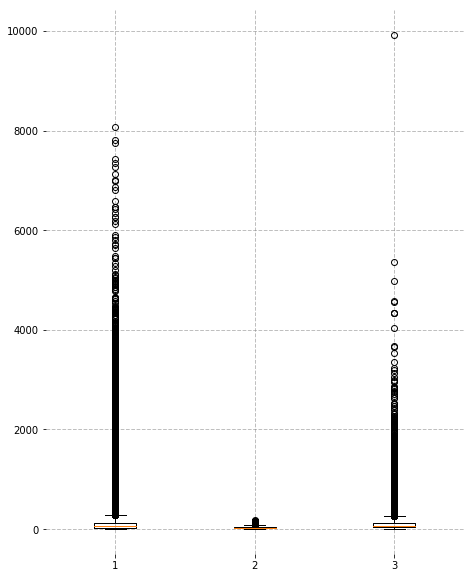

In [9]:
fig = plt.figure(figsize=(7.5,10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.grid(color='grey', linestyle='--', linewidth=1, axis="both",alpha=0.5)
plt.boxplot(lens, sym="o")
plt.show()

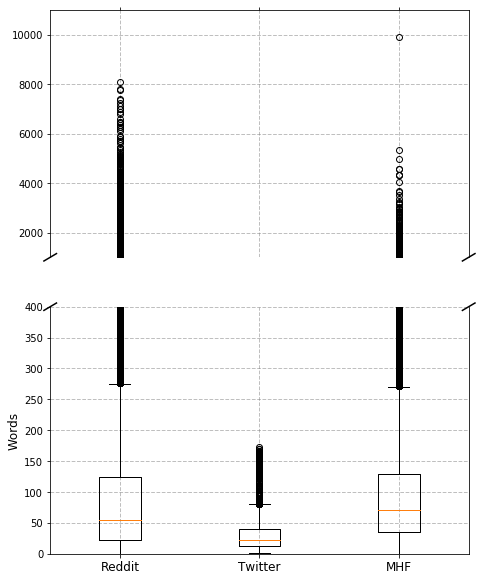

In [40]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7.5,10))

# plot the same data on both axes
ax.boxplot(lens)
ax2.boxplot(lens)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1000, 11000)  # outliers only
ax2.set_ylim(0, 400)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal


kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.grid(color='grey', linestyle='--', linewidth=1, axis="both",alpha=0.5)
ax2.grid(color='grey', linestyle='--', linewidth=1, axis="both",alpha=0.5)

plt.xticks([1, 2, 3], ['Reddit', 'Twitter', 'MHF'],fontsize=12)
plt.ylabel("Words",fontsize=12)

#plt.show()
plt.savefig("datasetstats.png",bbox_inches="tight")

In [18]:
keepindex = set()
for index, row in merge_df.iterrows():
    words = [s.lower() for s in word_tokenize(str(row.body))]
    for drug in drugs:
        try:
            if drug in words :
                keepindex.add(index)
                break
        except Exception as e:
            print(str(row.body), str(e))
    if index%1000==0:
        print(index, " done, ", len(keepindex), "mentions found")
#43520

0  done,  0 mentions found
1000  done,  78 mentions found
2000  done,  176 mentions found
3000  done,  265 mentions found
4000  done,  354 mentions found
5000  done,  467 mentions found
6000  done,  553 mentions found
7000  done,  666 mentions found
8000  done,  774 mentions found
9000  done,  888 mentions found
10000  done,  1001 mentions found
11000  done,  1130 mentions found
12000  done,  1264 mentions found
13000  done,  1397 mentions found
14000  done,  1510 mentions found
15000  done,  1605 mentions found
16000  done,  1744 mentions found
17000  done,  1857 mentions found
18000  done,  1982 mentions found
19000  done,  2104 mentions found
20000  done,  2214 mentions found
21000  done,  2319 mentions found
22000  done,  2441 mentions found
23000  done,  2553 mentions found
24000  done,  2681 mentions found
25000  done,  2787 mentions found
26000  done,  2912 mentions found
27000  done,  3040 mentions found
28000  done,  3173 mentions found
29000  done,  3319 mentions found
30000 

234000  done,  23202 mentions found
235000  done,  23234 mentions found
236000  done,  23270 mentions found
237000  done,  23293 mentions found
238000  done,  23325 mentions found
239000  done,  23371 mentions found
240000  done,  23405 mentions found
241000  done,  23438 mentions found
242000  done,  23466 mentions found
243000  done,  23495 mentions found
244000  done,  23530 mentions found
245000  done,  23566 mentions found
246000  done,  23594 mentions found
247000  done,  23628 mentions found
248000  done,  23663 mentions found
249000  done,  23698 mentions found
250000  done,  23731 mentions found
251000  done,  23785 mentions found
252000  done,  23833 mentions found
253000  done,  23874 mentions found
254000  done,  23924 mentions found
255000  done,  23964 mentions found
256000  done,  24005 mentions found
257000  done,  24036 mentions found
258000  done,  24077 mentions found
259000  done,  24125 mentions found
260000  done,  24160 mentions found
261000  done,  24195 mention

462000  done,  34281 mentions found
463000  done,  34342 mentions found
464000  done,  34412 mentions found
465000  done,  34488 mentions found
466000  done,  34544 mentions found
467000  done,  34601 mentions found
468000  done,  34659 mentions found
469000  done,  34707 mentions found
470000  done,  34772 mentions found
471000  done,  34837 mentions found
472000  done,  34888 mentions found
473000  done,  34947 mentions found
474000  done,  35015 mentions found
475000  done,  35083 mentions found
476000  done,  35134 mentions found
477000  done,  35207 mentions found
478000  done,  35268 mentions found
479000  done,  35325 mentions found
480000  done,  35390 mentions found
481000  done,  35450 mentions found
482000  done,  35506 mentions found
483000  done,  35557 mentions found
484000  done,  35619 mentions found
485000  done,  35690 mentions found
486000  done,  35763 mentions found
487000  done,  35831 mentions found
488000  done,  35901 mentions found
489000  done,  35959 mention

690000  done,  47291 mentions found
691000  done,  47346 mentions found
692000  done,  47402 mentions found
693000  done,  47467 mentions found
694000  done,  47519 mentions found
695000  done,  47556 mentions found
696000  done,  47614 mentions found
697000  done,  47665 mentions found
698000  done,  47718 mentions found
699000  done,  47784 mentions found
700000  done,  47843 mentions found
701000  done,  47892 mentions found
702000  done,  47957 mentions found
703000  done,  48028 mentions found
704000  done,  48098 mentions found
705000  done,  48135 mentions found
706000  done,  48195 mentions found
707000  done,  48252 mentions found
708000  done,  48343 mentions found
709000  done,  48401 mentions found
710000  done,  48456 mentions found
711000  done,  48493 mentions found
712000  done,  48571 mentions found
713000  done,  48613 mentions found
714000  done,  48656 mentions found
715000  done,  48703 mentions found
716000  done,  48749 mentions found
717000  done,  48788 mention

918000  done,  60474 mentions found
919000  done,  60541 mentions found
920000  done,  60626 mentions found
921000  done,  60688 mentions found
922000  done,  60778 mentions found
923000  done,  60824 mentions found
924000  done,  60863 mentions found
925000  done,  60929 mentions found
926000  done,  61000 mentions found
927000  done,  61060 mentions found
928000  done,  61139 mentions found
929000  done,  61187 mentions found
930000  done,  61247 mentions found
931000  done,  61306 mentions found
932000  done,  61356 mentions found
933000  done,  61452 mentions found
934000  done,  61505 mentions found
935000  done,  61592 mentions found
936000  done,  61675 mentions found
937000  done,  61738 mentions found
938000  done,  61801 mentions found
939000  done,  61859 mentions found
940000  done,  61911 mentions found
941000  done,  62000 mentions found
942000  done,  62107 mentions found
943000  done,  62167 mentions found
944000  done,  62220 mentions found
945000  done,  62251 mention

1142000  done,  76266 mentions found
1143000  done,  76378 mentions found
1144000  done,  76432 mentions found
1145000  done,  76494 mentions found
1146000  done,  76560 mentions found
1147000  done,  76622 mentions found
1148000  done,  76693 mentions found
1149000  done,  76772 mentions found
1150000  done,  76850 mentions found
1151000  done,  76948 mentions found
1152000  done,  77025 mentions found
1153000  done,  77096 mentions found
1154000  done,  77163 mentions found
1155000  done,  77251 mentions found
1156000  done,  77311 mentions found
1157000  done,  77399 mentions found
1158000  done,  77474 mentions found
1159000  done,  77544 mentions found
1160000  done,  77647 mentions found
1161000  done,  77730 mentions found
1162000  done,  77781 mentions found
1163000  done,  77922 mentions found
1164000  done,  77983 mentions found
1165000  done,  78023 mentions found
1166000  done,  78105 mentions found
1167000  done,  78180 mentions found
1168000  done,  78251 mentions found
1

1364000  done,  88502 mentions found
1365000  done,  88507 mentions found
1366000  done,  88516 mentions found
1367000  done,  88526 mentions found
1368000  done,  88535 mentions found
1369000  done,  88544 mentions found
1370000  done,  88554 mentions found
1371000  done,  88564 mentions found
1372000  done,  88572 mentions found
1373000  done,  88578 mentions found
1374000  done,  88581 mentions found
1375000  done,  88591 mentions found
1376000  done,  88595 mentions found
1377000  done,  88608 mentions found
1378000  done,  88616 mentions found
1379000  done,  88626 mentions found
1380000  done,  88633 mentions found
1381000  done,  88637 mentions found
1382000  done,  88649 mentions found
1383000  done,  88672 mentions found
1384000  done,  88683 mentions found
1385000  done,  88695 mentions found
1386000  done,  88703 mentions found
1387000  done,  88709 mentions found
1388000  done,  88715 mentions found
1389000  done,  88720 mentions found
1390000  done,  88725 mentions found
1

1586000  done,  90550 mentions found
1587000  done,  90559 mentions found
1588000  done,  90565 mentions found
1589000  done,  90572 mentions found
1590000  done,  90581 mentions found
1591000  done,  90592 mentions found
1592000  done,  90607 mentions found
1593000  done,  90619 mentions found
1594000  done,  90632 mentions found
1595000  done,  90644 mentions found
1596000  done,  90653 mentions found
1597000  done,  90659 mentions found
1598000  done,  90672 mentions found
1599000  done,  90680 mentions found
1600000  done,  90692 mentions found
1601000  done,  90698 mentions found
1602000  done,  90703 mentions found
1603000  done,  90706 mentions found
1604000  done,  90707 mentions found
1605000  done,  90710 mentions found
1606000  done,  90724 mentions found
1607000  done,  90730 mentions found
1608000  done,  90739 mentions found
1609000  done,  90745 mentions found
1610000  done,  90751 mentions found
1611000  done,  90762 mentions found
1612000  done,  90770 mentions found
1

1808000  done,  92454 mentions found
1809000  done,  92473 mentions found
1810000  done,  92476 mentions found
1811000  done,  92479 mentions found
1812000  done,  92487 mentions found
1813000  done,  92493 mentions found
1814000  done,  92496 mentions found
1815000  done,  92508 mentions found
1816000  done,  92522 mentions found
1817000  done,  92539 mentions found
1818000  done,  92549 mentions found
1819000  done,  92556 mentions found
1820000  done,  92566 mentions found
1821000  done,  92573 mentions found
1822000  done,  92582 mentions found
1823000  done,  92593 mentions found
1824000  done,  92604 mentions found
1825000  done,  92606 mentions found
1826000  done,  92618 mentions found
1827000  done,  92629 mentions found
1828000  done,  92641 mentions found
1829000  done,  92650 mentions found
1830000  done,  92664 mentions found
1831000  done,  92683 mentions found
1832000  done,  92693 mentions found
1833000  done,  92715 mentions found
1834000  done,  92722 mentions found
1

2030000  done,  94834 mentions found
2031000  done,  94846 mentions found
2032000  done,  94858 mentions found
2033000  done,  94877 mentions found
2034000  done,  94883 mentions found
2035000  done,  94900 mentions found
2036000  done,  94920 mentions found
2037000  done,  94926 mentions found
2038000  done,  94939 mentions found
2039000  done,  94949 mentions found
2040000  done,  94962 mentions found
2041000  done,  94984 mentions found
2042000  done,  95001 mentions found
2043000  done,  95011 mentions found
2044000  done,  95017 mentions found
2045000  done,  95025 mentions found
2046000  done,  95034 mentions found
2047000  done,  95053 mentions found
2048000  done,  95065 mentions found
2049000  done,  95078 mentions found
2050000  done,  95092 mentions found
2051000  done,  95112 mentions found
2052000  done,  95123 mentions found
2053000  done,  95131 mentions found
2054000  done,  95146 mentions found
2055000  done,  95163 mentions found
2056000  done,  95178 mentions found
2

In [ ]:
list(sorted(keepindex))

In [20]:
mentions_df = merge_df.iloc[list(sorted(keepindex))]

In [21]:
mentions_df = mentions_df[['id','link_id','parent_id','wordlen','body']]

In [ ]:
mentions_df

In [ ]:
_=mentions_df.wordlen.hist(bins=100, figsize=(16,8))

In [23]:
mentions_df.to_csv("posts_drug_mentions.csv", index=False, sep="|", encoding="utf-8")

In [ ]:
print("Total Posts", len(mentions_df.id))
print("Shortest post", mentions_df.wordlen.min())
print("Longest post",mentions_df.wordlen.max())
print("Mean length post",mentions_df.wordlen.mean())
print("Median length post",mentions_df.wordlen.median())
print("Mode length post",mentions_df[mentions_df.wordlen>1].wordlen.mode())


In [ ]:
cutoff = 120
_=mentions_df[mentions_df.wordlen>cutoff].wordlen.hist(bins=100, figsize=(16,8))
print("Total Posts", len(mentions_df[mentions_df.wordlen>cutoff].id))
print("Shortest post", mentions_df[mentions_df.wordlen>cutoff].wordlen.min())
print("Longest post",mentions_df[mentions_df.wordlen>cutoff].wordlen.max())
print("Mean length post",mentions_df[mentions_df.wordlen>cutoff].wordlen.mean())
print("Median length post",mentions_df[mentions_df.wordlen>cutoff].wordlen.median())
print("Mode length post",mentions_df[mentions_df.wordlen>cutoff].wordlen.mode())

In [ ]:
_=mentions_df[mentions_df.wordlen>cutoff].boxplot(column="wordlen")

In [ ]:
cutoff = 120
for index, row in mentions_df[mentions_df.wordlen>200].iterrows():
    #try:
    print(index, ":", len(row.body.split()), len(row.body.split(".")), row.body)
    #except Exception as e:
        #print(str(row.body), str(e))

In [169]:
teststr = ""

In [143]:
import nltk
from nltk import sent_tokenize, word_tokenize

In [172]:
print(len(sent_tokenize(teststr)))
print(len(word_tokenize(teststr)))
print(len(teststr))

35
760
3538


In [ ]:
sent_len = 0
my_sent=""
for sent in sent_tokenize(teststr):
    this_len = len(word_tokenize(sent))
    if sent_len+this_len<120:
        my_sent = my_sent + " " + sent
        sent_len += this_len
    else:
        print(my_sent.strip())
        print(len((my_sent)))
        my_sent=sent
        sent_len = 0
print(my_sent.strip())
print(len((my_sent)))

In [27]:
cutoff = 120
with open('post_drug_mentions_shortened1.csv', 'w', encoding='UTF-8') as writer:
    writer.write("id|link_id|parent_id|wordlen|body\n")
    for index, row in mentions_df.iterrows():
        if row.wordlen>cutoff:
            bodytext = row.body
            sent_len = 0
            my_sent=""
            for sent in sent_tokenize(bodytext):
                this_len = len(word_tokenize(sent))
                if sent_len+this_len<=cutoff:
                    my_sent = my_sent + " " + sent
                    sent_len += this_len
                else:
                    my_len = len(word_tokenize(my_sent))
                    if my_len<120:
                        #print(my_len)
                        #print(this_len)
                        #print(sent)
                        #print(my_sent)
                        writer.write(str(row.id) + "|" + str(row.link_id) + "|" + str(row.parent_id) + "|" + str(my_len) + "|" + my_sent.strip().replace("\n","").replace("|","")+"\n")
                    #print(my_sent.strip())
                    my_sent=sent
                    sent_len = this_len
            my_len = len(word_tokenize(my_sent))
            if my_len<120:
                #print(my_len)
                #print(this_len)
                #print(sent)
                #print(my_sent)
                writer.write(str(row.id) + "|" + str(row.link_id) + "|" + str(row.parent_id) + "|" + str(my_len) + "|" + my_sent.strip().replace("\n","").replace("|","")+"\n")
            #print(my_sent.strip())
            #print(len((my_sent)))
        else:
            writer.write(str(row.id) + "|" + str(row.link_id) + "|" + str(row.parent_id) + "|" + str(row.wordlen) + "|" + row.body.replace("\n","").replace("|","")+"\n")

In [29]:
mentions_df_s = pd.read_csv('post_drug_mentions_shortened1.csv', sep="|", encoding='UTF-8')

In [ ]:
print("Total Posts", len(mentions_df_s.id))
print("Shortest post", mentions_df_s.wordlen.min())
print("Longest post",mentions_df_s.wordlen.max())
print("Mean length post",mentions_df_s.wordlen.mean())
print("Median length post",mentions_df_s.wordlen.median())
print("Mode length post",mentions_df_s.wordlen.mode())


In [31]:
keepindex = set()
for index, row in mentions_df_s.iterrows():
    words = [s.lower() for s in word_tokenize(str(row.body))]
    for drug in drugs:
        try:
            if drug in words :
                keepindex.add(index)
                break
        except Exception as e:
            print(str(row.body), str(e))
    if index%1000==0:
        print(index, " done, ", len(keepindex), "mentions found")

0  done,  1 mentions found
1000  done,  477 mentions found
2000  done,  979 mentions found
3000  done,  1488 mentions found
4000  done,  1986 mentions found
5000  done,  2483 mentions found
6000  done,  2922 mentions found
7000  done,  3449 mentions found
8000  done,  3924 mentions found
9000  done,  4395 mentions found
10000  done,  4880 mentions found
11000  done,  5361 mentions found
12000  done,  5817 mentions found
13000  done,  6322 mentions found
14000  done,  6806 mentions found
15000  done,  7289 mentions found
16000  done,  7734 mentions found
17000  done,  8189 mentions found
18000  done,  8633 mentions found
19000  done,  9076 mentions found
20000  done,  9565 mentions found
21000  done,  10022 mentions found
22000  done,  10444 mentions found
23000  done,  10872 mentions found
24000  done,  11303 mentions found
25000  done,  11777 mentions found
26000  done,  12216 mentions found
27000  done,  12680 mentions found
28000  done,  13133 mentions found
29000  done,  13618 ment

In [32]:
final_posts = mentions_df_s.iloc[list(sorted(keepindex))]

In [ ]:
print("Total Posts", len(final_posts.id))
print("Shortest post", final_posts.wordlen.min())
print("Longest post",final_posts.wordlen.max())
print("Mean length post",final_posts.wordlen.mean())
print("Median length post",final_posts.wordlen.median())
print("Mode length post",final_posts.wordlen.mode())

In [34]:
final_posts.to_csv("final_posts.csv", index=False, sep="|", encoding="utf-8")

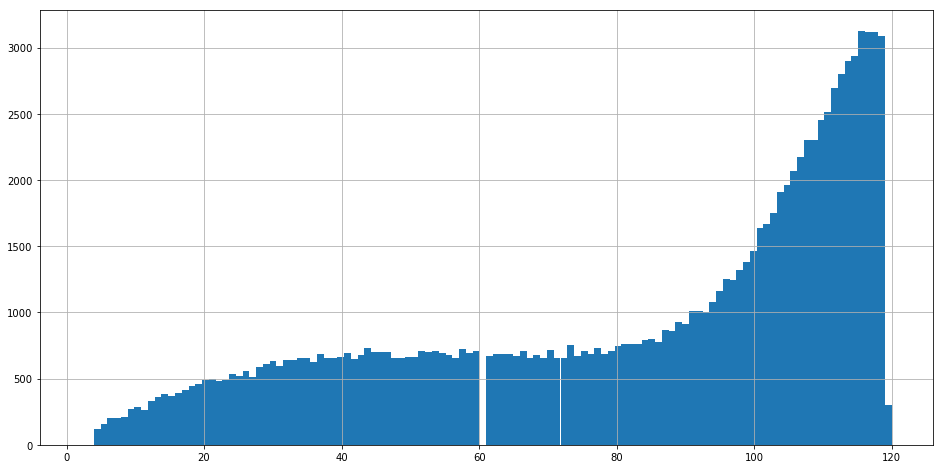

In [37]:
_=final_posts.wordlen.hist(bins=120, figsize=(16,8))

In [ ]:
for index, row in final_posts.sample(20).iterrows():
    print(row.body+"\n")

In [ ]:
final_posts["body"] = final_posts["body"].str.lower()

In [ ]:
final_posts["body"]

In [ ]:
final_posts['words'] = final_posts['body'].apply(word_tokenize)

In [ ]:
for index, row in final_posts.sample(20).iterrows():
    print(row.words)
    print("\n")

In [ ]:
def tag_pos(mylist):
    return [x[1] for x in pos_tag(mylist)]
final_posts["pos"] = final_posts.words.apply(tag_pos)

In [ ]:
for index, row in final_posts.iterrows():
    if len(row.pos)!=len(row.words):
        print(index)

In [ ]:
final_posts

In [16]:
def ret_len(mystr):
    return len(word_tokenize(mystr))

def tag_pos(mylist):
    return [x[1] for x in pos_tag(mylist)]

In [17]:
final_posts["wordlen"] = final_posts.body.apply(ret_len)
final_posts['words'] = final_posts['body'].apply(word_tokenize)
final_posts["pos"] = final_posts.words.apply(tag_pos)

In [ ]:
final_posts.to_csv("final_posts.csv", index=False, sep="|", encoding="utf-8")